### the data was downloaded in my pc, and get from a kaggle competition (https://www.kaggle.com/c/dogs-vs-cats), if you want to replicate, go to kaggle, get the data and change the sources in the code.

#### this code is for academic uses, to create different models of deep learning to evaluate dogs and cats image classification problem, apply data augmentation to increase the accuracy, and based on the performance of the models select the best model


##### note: in the final chunk i change the labels cat : "bolonio", dog: "no bolonio", thats a joke in my family, feel free to change the labels if you want

In [2]:
# T8
import cv2
import tensorflow as tf


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1660 Ti, compute capability 7.5


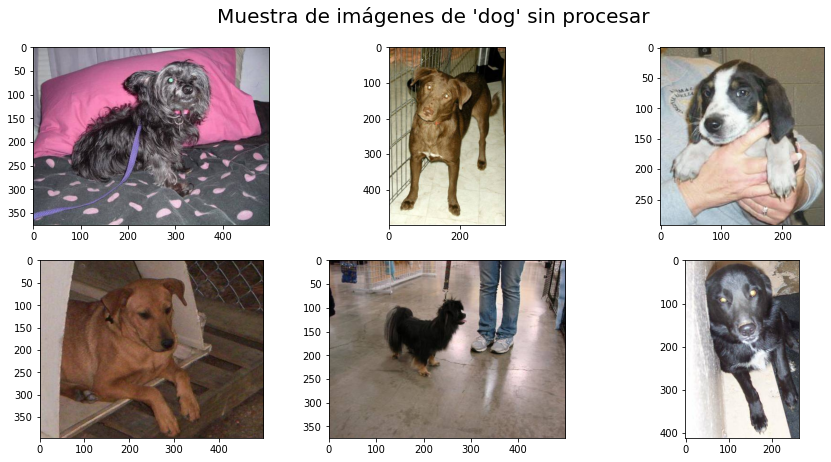

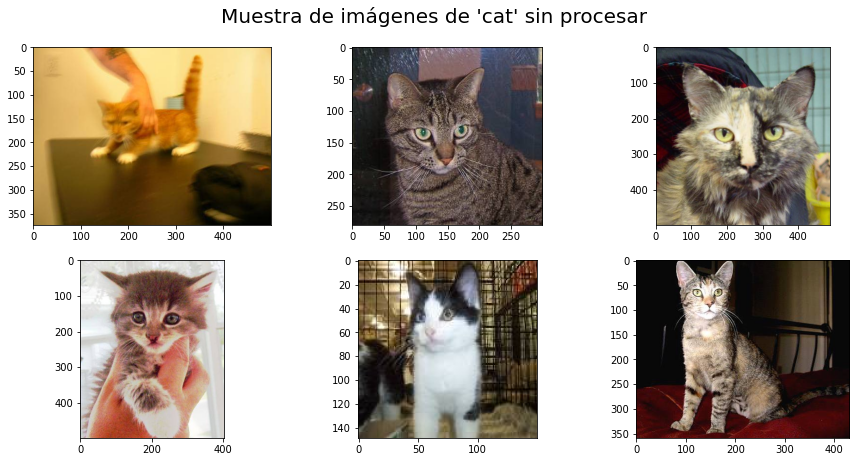

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.figure(figsize=(15,7))

# vista imagenes good
folder = "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/train/dog"
img = os.listdir(folder)



for i, name in enumerate(img[:6]):
    plt.subplot(2,3,i+1)
    fig=mpimg.imread(folder+"/"+name)
    plt.imshow(fig)
    plt.suptitle("Muestra de imágenes de 'dog' sin procesar",size=20)
plt.subplots_adjust(top=0.90)
plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Preprocesamiento/input_dog.png")
plt.show()


# vista imagenes rotten
folder = "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/train/cat"
img = os.listdir(folder)


plt.figure(figsize=(15,7))
for i, name in enumerate(img[:6]):
    plt.subplot(2,3,i+1)
    fig=mpimg.imread(folder+"/"+name)
    plt.imshow(fig)
    plt.suptitle("Muestra de imágenes de 'cat' sin procesar",size=20)
plt.subplots_adjust(top=0.90)
plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Preprocesamiento/input_cat.png")
plt.show()



In [45]:
# aplicando "data augmentation"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch = 128
dimension_fig = (100,100)


data_generator0 = ImageDataGenerator(
    rescale=1./255,#normalización de pixeles,
    validation_split=0.3
)


data_generator = ImageDataGenerator(
    rescale=1./255,#normalización de pixeles,
    rotation_range=30,
    vertical_flip=True,
    horizontal_flip=True,
    width_shift_range=0.10,
    height_shift_range=0.10,
 #   shear_range=15,
    zoom_range=[0.5,1.25],
    validation_split=0.3
)



training_set = data_generator0.flow_from_directory(
    "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/train",
    color_mode= "grayscale",
    target_size=dimension_fig,
    batch_size=batch,
    shuffle=True,
    subset="training"
)

test_set = data_generator0.flow_from_directory(
    "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/train",
    color_mode= "grayscale",
    target_size=dimension_fig,
    batch_size=batch,
    shuffle=True,
    subset="validation"
)



training_set_a = data_generator.flow_from_directory(
    "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/train",
    color_mode= "grayscale",
    target_size=dimension_fig,
    batch_size=batch,
    shuffle=True,
    subset="training"
)

test_set_a = data_generator.flow_from_directory(
    "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/train",
    color_mode= "grayscale",
    target_size=dimension_fig,
    batch_size=batch,
    shuffle=True,
    subset="validation"
)






Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.
Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


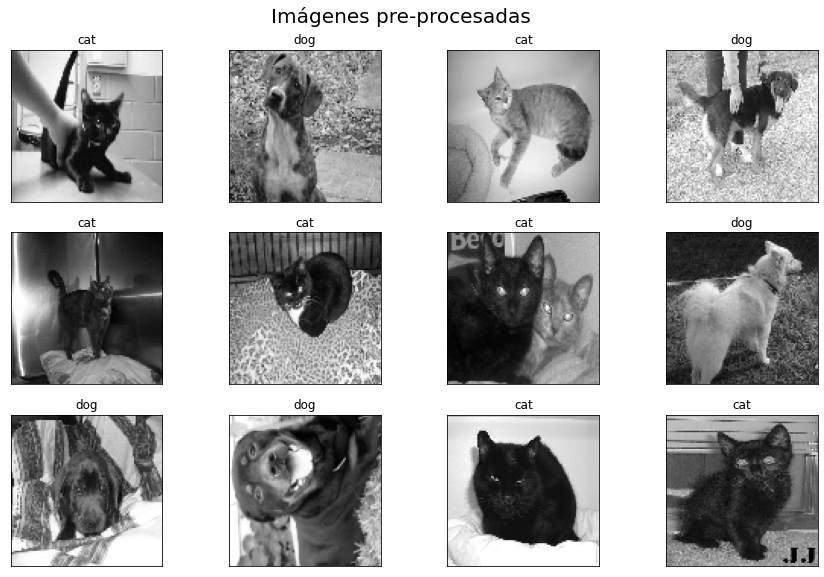

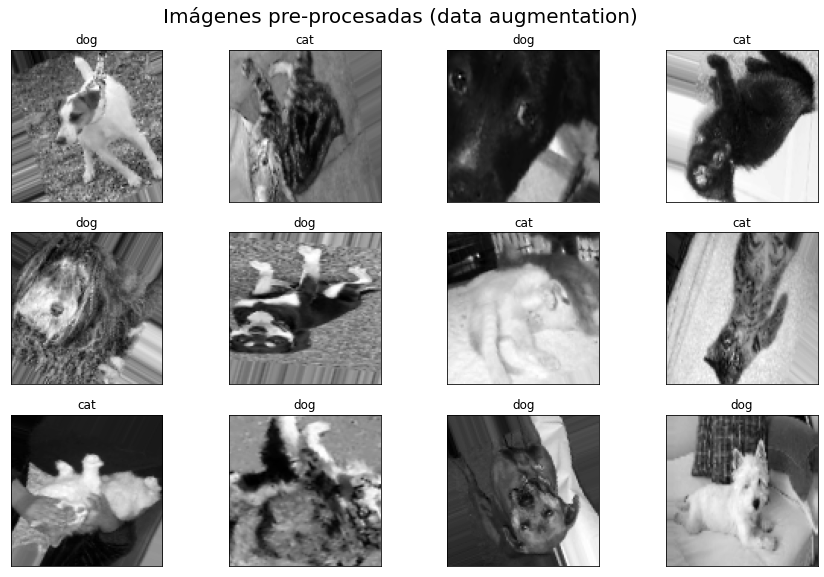

In [39]:
j=0
plt.figure(figsize=(15,15))
for img, label in training_set:
    for i in range(12):
        plt.subplot(5,4,j+1)
        j+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img[i],cmap="gray")
        plt.title("cat" if label[i][0]==1 else "dog")
        plt.suptitle("Imágenes pre-procesadas",size=20)
    break

plt.subplots_adjust(top=0.94)
plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Preprocesamiento/transformed_input_data.png")
plt.show()
    

j=0
plt.figure(figsize=(15,15))
for img, label in training_set_a:
    for i in range(12):
        plt.subplot(5,4,j+1)
        j+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img[i],cmap="gray")
        plt.title("cat" if label[i][0]==1 else "dog")
        plt.suptitle("Imágenes pre-procesadas (data augmentation)",size=20)
    break

plt.subplots_adjust(top=0.94)
plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Preprocesamiento/transformed_input_data_augmentation.png")
plt.show()
    

In [46]:
##### Modelos


# model 0: Basic

model_0=Sequential()
model_0.add(Dense(32,activation="relu",input_shape=training_set.image_shape))
model_0.add(Dense(32,activation="relu"))
model_0.add(Flatten())
model_0.add(Dense(2,activation="sigmoid",dtype='float32'))


# model 1: Dense

model_1=Sequential()
model_1.add(Dense(12,activation="relu",input_shape=training_set.image_shape))
model_1.add(Dense(12,activation="relu"))
model_1.add(Dense(12,activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(2,activation="sigmoid",dtype='float32'))


# model 2: Dense more neurons 

model_2=Sequential()
model_2.add(Dense(32,activation="relu",input_shape=training_set.image_shape))
model_2.add(Dense(32,activation="relu"))
model_2.add(Dense(32,activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(2,activation="sigmoid",dtype='float32'))


# model 3: Dense more neurons with sigmoid 

model_3=Sequential()
model_3.add(Dense(32,activation="sigmoid",input_shape=training_set.image_shape))
model_3.add(Dense(32,activation="sigmoid"))
model_3.add(Dense(32,activation="sigmoid"))
model_3.add(Flatten())
model_3.add(Dense(2,activation="sigmoid",dtype='float32'))


# model 4: Convolutional
model_4=Sequential()
model_4.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=training_set.image_shape))
model_4.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model_4.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model_4.add(Flatten())
model_4.add(Dense(32,activation="relu"))
model_4.add(Dense(2,activation="sigmoid",dtype='float32'))


# model 5: Convolutional max pooling
model_5=Sequential()
model_5.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=training_set.image_shape))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Flatten())
model_5.add(Dense(32,activation="relu"))
model_5.add(Dense(2,activation="sigmoid",dtype='float32'))


# model 6: Convolutional max pooling dropout
model_6=Sequential()
model_6.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=training_set.image_shape))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Flatten())
model_6.add(Dropout(0.25))
model_6.add(Dense(32,activation="relu"))
model_6.add(Dense(2,activation="sigmoid",dtype='float32'))



####### compilación

model_0.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])

model_1.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])

model_2.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])

model_3.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])

model_4.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])              

model_5.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])              

model_6.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),#el parámetro será la tasa de aprendizaje
              metrics=['accuracy'])              



#model.summary()


In [165]:
model_6.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 10, 10, 128)    

In [47]:
from datetime import datetime

def ahora():
    now = datetime.now()

    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

In [48]:

def fit_model(x,data_train,data_test,epocas=25):
    resultado=x.fit(data_train,
          batch_size=128,
          epochs=epocas,
          verbose=1,
          validation_data=data_test)
    return resultado

In [49]:
ahora()
result_0=fit_model(model_0,training_set,test_set)
ahora()
result_1=fit_model(model_1,training_set,test_set)
ahora()
result_2=fit_model(model_2,training_set,test_set)
ahora()
result_3=fit_model(model_3,training_set,test_set)
ahora()
result_4=fit_model(model_4,training_set,test_set)
ahora()
result_5=fit_model(model_5,training_set,test_set)
ahora()
result_6=fit_model(model_6,training_set,test_set)
ahora()
print("data augmentation")
ahora()
result_0a=fit_model(model_0,training_set_a,test_set_a)
ahora()
result_1a=fit_model(model_1,training_set_a,test_set_a)
ahora()
result_2a=fit_model(model_2,training_set_a,test_set_a)
ahora()
result_3a=fit_model(model_3,training_set_a,test_set_a)
ahora()
result_4a=fit_model(model_4,training_set_a,test_set_a)
ahora()
result_5a=fit_model(model_5,training_set_a,test_set_a)
ahora()
result_6a=fit_model(model_6,training_set_a,test_set_a)
ahora()



Current Time = 10:45:39
Epoch 1/25
137/137 [==============================] - 45s 301ms/step - loss: 0.8465 - accuracy: 0.5525 - val_loss: 0.6717 - val_accuracy: 0.5873
Epoch 2/25
137/137 [==============================] - 30s 220ms/step - loss: 0.6723 - accuracy: 0.5894 - val_loss: 0.6697 - val_accuracy: 0.5884
Epoch 3/25
137/137 [==============================] - 28s 207ms/step - loss: 0.6610 - accuracy: 0.6089 - val_loss: 0.6724 - val_accuracy: 0.5764
Epoch 4/25
137/137 [==============================] - 28s 207ms/step - loss: 0.6516 - accuracy: 0.6201 - val_loss: 0.6716 - val_accuracy: 0.5895
Epoch 5/25
137/137 [==============================] - 28s 205ms/step - loss: 0.6473 - accuracy: 0.6306 - val_loss: 0.6785 - val_accuracy: 0.5860
Epoch 6/25
137/137 [==============================] - 28s 208ms/step - loss: 0.6422 - accuracy: 0.6351 - val_loss: 0.6741 - val_accuracy: 0.5895
Epoch 7/25
137/137 [==============================] - 28s 205ms/step - loss: 0.6333 - accuracy: 0.6487 - v

In [131]:
ahora()
score_0 = model_0.evaluate(test_set, verbose=1)
ahora()
score_1 = model_1.evaluate(test_set, verbose=1)
ahora()
score_2 = model_2.evaluate(test_set, verbose=1)
ahora()
score_3 = model_3.evaluate(test_set, verbose=1)
ahora()
score_4 = model_4.evaluate(test_set, verbose=1)
ahora()
score_5 = model_5.evaluate(test_set, verbose=1)
ahora()
score_6 = model_6.evaluate(test_set, verbose=1)

ahora()
score_0a = model_0.evaluate(test_set_a, verbose=1)
ahora()
score_1a = model_1.evaluate(test_set_a, verbose=1)
ahora()
score_2a = model_2.evaluate(test_set_a, verbose=1)
ahora()
score_3a = model_3.evaluate(test_set_a, verbose=1)
ahora()
score_4a = model_4.evaluate(test_set_a, verbose=1)
ahora()
score_5a = model_5.evaluate(test_set_a, verbose=1)
ahora()
score_6a = model_6.evaluate(test_set_a, verbose=1)


#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Current Time = 16:26:41
59/59 [==============================] - 13s 209ms/step - loss: 0.6793 - accuracy: 0.5733
Current Time = 16:26:54
59/59 [==============================] - 9s 146ms/step - loss: 0.6845 - accuracy: 0.5588
Current Time = 16:27:02
59/59 [==============================] - 9s 147ms/step - loss: 0.6850 - accuracy: 0.5592
Current Time = 16:27:11
59/59 [==============================] - 9s 148ms/step - loss: 0.6922 - accuracy: 0.4960
Current Time = 16:27:21
59/59 [==============================] - 18s 296ms/step - loss: 0.6931 - accuracy: 0.5000
Current Time = 16:27:38
59/59 [==============================] - 9s 149ms/step - loss: 0.4161 - accuracy: 0.8173
Current Time = 16:27:47
59/59 [==============================] - 9s 146ms/step - loss: 0.3764 - accuracy: 0.8261
Current Time = 16:27:56
59/59 [==============================] - 14s 238ms/step - loss: 0.6831 - accuracy: 0.5563
Current Time = 16:28:11
59/59 [==============================] - 14s 241ms/step - loss: 0.686

In [135]:
# data frame results
import pandas as pd

models=["M_0","M_0_a","M_1","M_1_a","M_2","M_2_a","M_3","M_3_a","M_4","M_4_a","M_5","M_5_a","M_6","M_6_a"]
loss=[score_0[0],score_0a[0],score_1[0],score_1a[0],score_2[0],score_2a[0],score_3[0],score_3a[0],score_4[0],score_4a[0],score_5[0],score_5a[0],score_6[0],score_6a[0]]
acc=[score_0[1],score_0a[1],score_1[1],score_1a[1],score_2[1],score_2a[1],score_3[1],score_3a[1],score_4[1],score_4a[1],score_5[1],score_5a[1],score_6[1],score_6a[1]]


results=pd.DataFrame(list(zip(models, loss,acc)),
               columns =['Modelo', 'Loss',"Accuracy"])


In [145]:
results

,Modelo,Loss,Accuracy
0,M_0,0.679340,0.573333
1,M_0_a,0.683055,0.556267
2,M_1,0.684488,0.558800
3,M_1_a,0.686302,0.549067
4,M_2,0.685041,0.559200
5,M_2_a,0.685519,0.551867
6,M_3,0.692197,0.496000
7,M_3_a,0.692770,0.495467
8,M_4,0.693147,0.500000
9,M_4_a,0.693147,0.500000


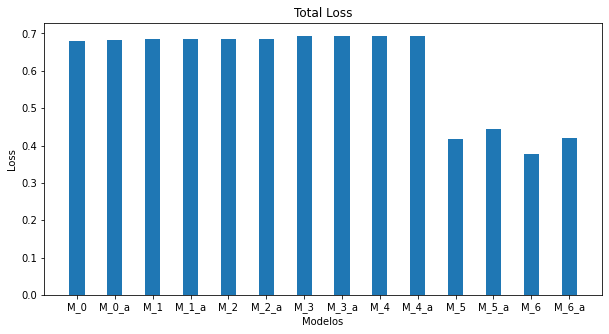

<Figure size 432x288 with 0 Axes>

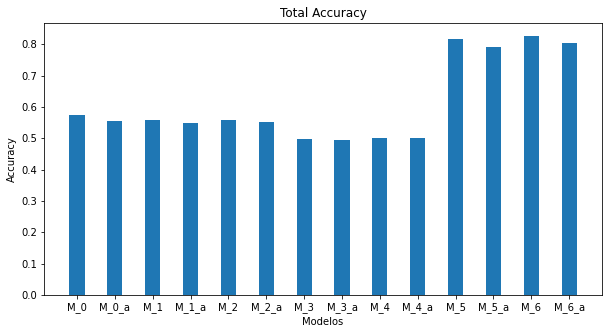

<Figure size 432x288 with 0 Axes>

In [149]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(results.iloc[:, 0], results.iloc[:, 1],
        width = 0.4)
 
plt.xlabel("Modelos")
plt.ylabel("Loss")
plt.title("Total Loss")
plt.show()
plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Total_loss.png")


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(results.iloc[:, 0], results.iloc[:, 2],
        width = 0.4)
 
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.title("Total Accuracy")
plt.show()
plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Total_accuracy.png")



results.to_csv("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Metrics_all_models.csv")

In [129]:
a=[["M_0","M_0_a","M_1","M_1_a","M_2","M_2_a","M_3","M_3_a","M_4","M_4_a","M_5","M_5_a","M_6","M_6_a"],\
    [result_0,result_0a,result_1,result_1a,result_2,result_2a,result_3,result_3a,result_4,result_4a,result_5,result_5a,result_6,result_6a]\
        ]

        

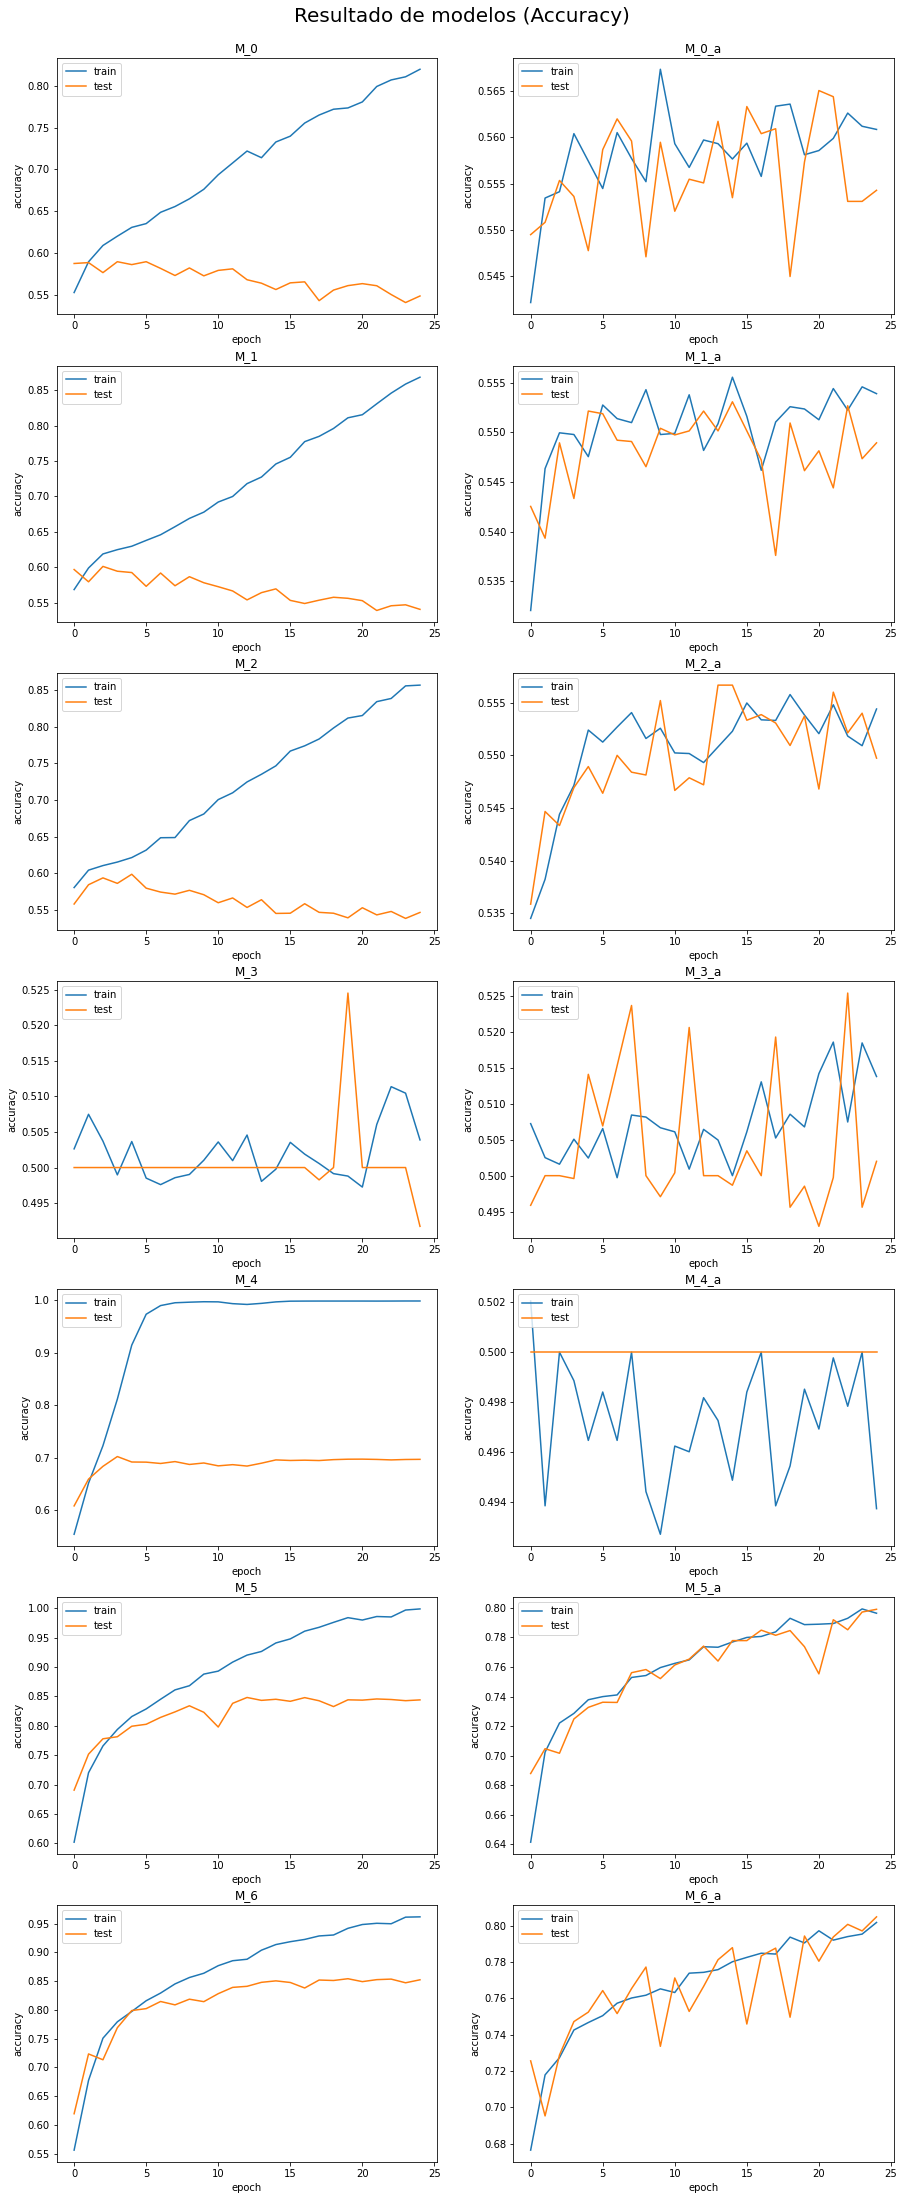

In [121]:

j=0
plt.figure(figsize=(15,35))

for i in range(len(a[0])):
    plt.subplot(7,2,j+1)
    j+=1
    plt.plot(a[1][i].history['accuracy'])
    plt.plot(a[1][i].history['val_accuracy'])
    plt.title(a[0][i])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.suptitle("Resultado de modelos (Accuracy)",size=20)
    

plt.subplots_adjust(top=0.96)

plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Result_models_accuracy.png")



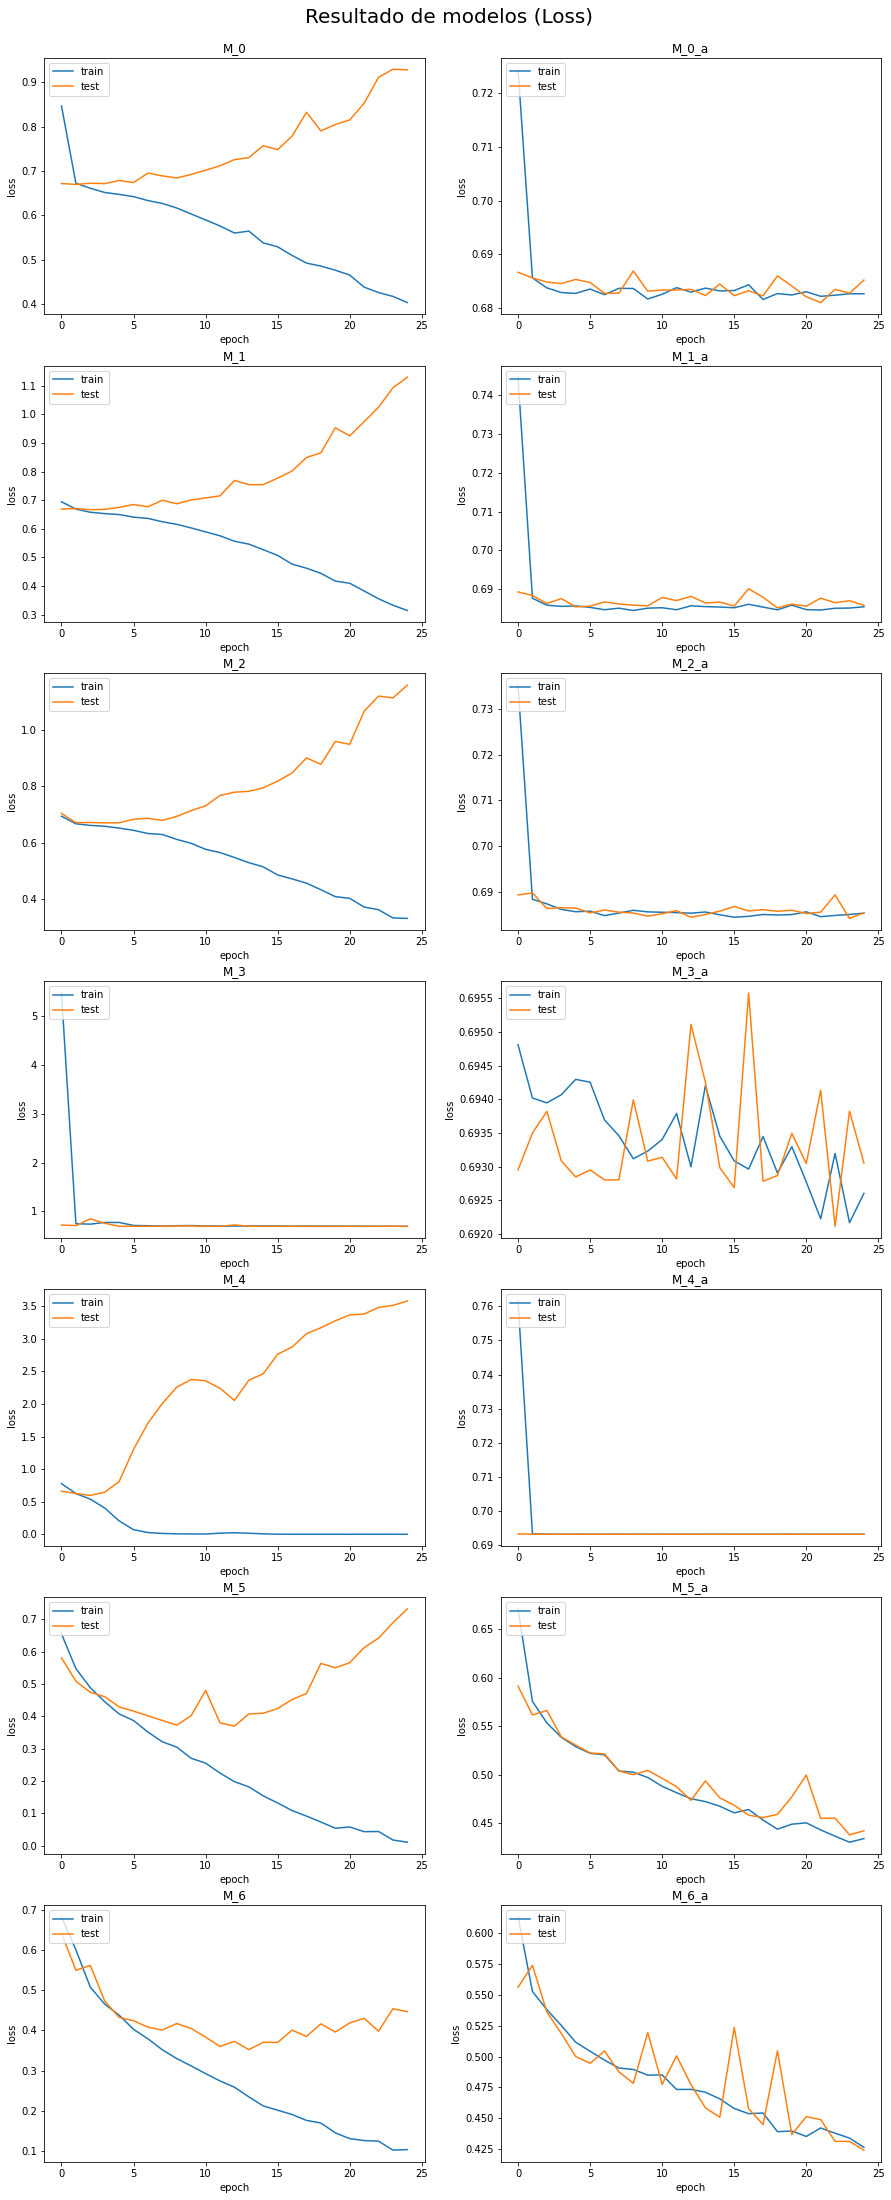

In [122]:

j=0
plt.figure(figsize=(15,35))

for i in range(len(a[0])):
    plt.subplot(7,2,j+1)
    j+=1
    plt.plot(a[1][i].history['loss'])
    plt.plot(a[1][i].history['val_loss'])
    plt.title(a[0][i])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.suptitle("Resultado de modelos (Loss)",size=20)
    

plt.subplots_adjust(top=0.96)

plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Result_models_loss.png")

In [125]:
import numpy as np

# Guardar el Modelo
model_0.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_0.h5")
model_1.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_1.h5")
model_2.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_2.h5")
model_3.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_3.h5")
model_4.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_4.h5")
model_5.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_5.h5")
model_6.save("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/model_6.h5")


np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_0.npy',result_0.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_1.npy',result_1.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_2.npy',result_2.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_3.npy',result_3.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_4.npy',result_4.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_5.npy',result_5.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_6.npy',result_6.history)


np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_0a.npy',result_0a.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_1a.npy',result_1a.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_2a.npy',result_2a.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_3a.npy',result_3a.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_4a.npy',result_4a.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_5a.npy',result_5a.history)
np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_6a.npy',result_6a.history)


In [150]:
### modelo final
result_final=fit_model(model_5,training_set_a,test_set_a,100)

Epoch 1/100
137/137 [==============================] - 52s 376ms/step - loss: 0.4330 - accuracy: 0.7962 - val_loss: 0.4637 - val_accuracy: 0.7768
Epoch 2/100
137/137 [==============================] - 47s 340ms/step - loss: 0.4245 - accuracy: 0.8033 - val_loss: 0.4387 - val_accuracy: 0.7953
Epoch 3/100
137/137 [==============================] - 47s 340ms/step - loss: 0.4208 - accuracy: 0.8044 - val_loss: 0.4272 - val_accuracy: 0.8043
Epoch 4/100
137/137 [==============================] - 46s 338ms/step - loss: 0.4203 - accuracy: 0.8042 - val_loss: 0.4221 - val_accuracy: 0.8037
Epoch 5/100
137/137 [==============================] - 47s 339ms/step - loss: 0.4183 - accuracy: 0.8082 - val_loss: 0.4335 - val_accuracy: 0.7973
Epoch 6/100
137/137 [==============================] - 47s 341ms/step - loss: 0.4183 - accuracy: 0.8070 - val_loss: 0.4197 - val_accuracy: 0.8095
Epoch 7/100
137/137 [==============================] - 47s 342ms/step - loss: 0.4097 - accuracy: 0.8115 - val_loss: 0.4195 -

In [151]:

score_final = model_5.evaluate(test_set_a, verbose=1)


59/59 [==============================] - 14s 242ms/step - loss: 0.3388 - accuracy: 0.8545


In [175]:
print("Final loss: ",score_final[0])
print("Final accuracy: ",score_final[1])

Final loss:  0.33875414729118347
Final accuracy:  0.854533314704895


In [ ]:

np.save('C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/result_final.npy',result_final.history)

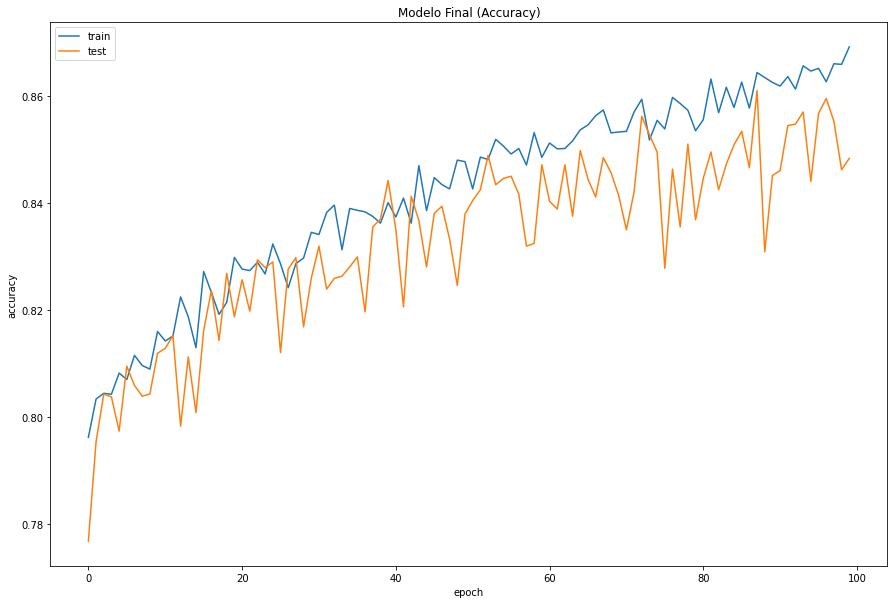

<Figure size 432x288 with 0 Axes>

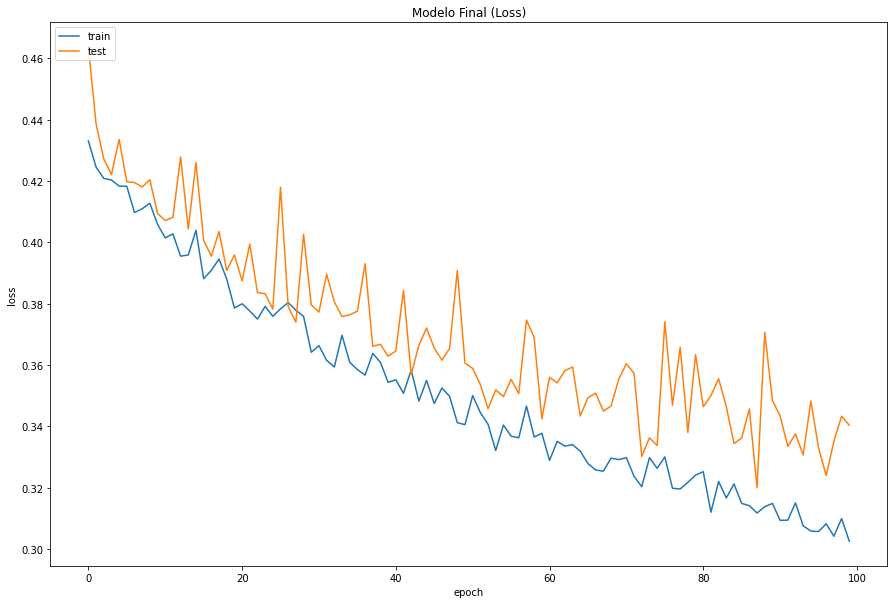

<Figure size 432x288 with 0 Axes>

In [171]:
plt.figure(figsize=(15,10))
plt.plot(result_final.history['accuracy'])
plt.plot(result_final.history['val_accuracy'])
plt.title("Modelo Final (Accuracy)")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Result_final_acc.png")
plt.figure(figsize=(15,10))
plt.plot(result_final.history['loss'])
plt.plot(result_final.history['val_loss'])
plt.title("Modelo Final (Loss)")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.savefig("C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/Figuras/Modelos/Result_final_loss.png")


In [199]:
model_5.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 10, 10, 128)    

Found 6 images belonging to 1 classes.


<Figure size 432x288 with 0 Axes>

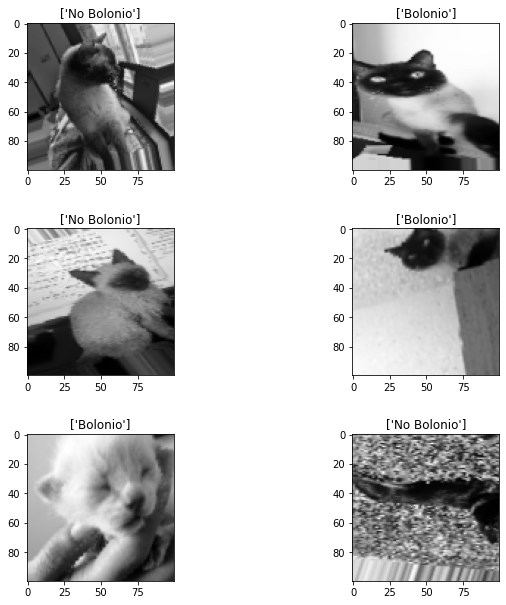

In [211]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np


labels =["Bolonio","no Bolonio"]

# vista imagenes rotten
folder = "C:/Users/andre/Downloads/Introducción al deep learning UMA/T8_Proyecto/dataset/test"
img = os.listdir(folder)

dimension_fig = (100,100)

val_set = data_generator.flow_from_directory(folder,
    color_mode="grayscale",
    target_size=dimension_fig,
    batch_size=batch,
    shuffle=False
)






prediction = model_5.predict(val_set,verbose=0)
# val= float( prediction.argmax(axis=-1))
# pred_lab=labels[int(prediction.argmax(axis=-1))]

prediction

# prediccion=model_5.predict(val_set,verbose=0)
classes=np.argmax(prediction,axis=1)



plt.subplots_adjust(top=0.9,wspace=0.4,hspace=0.4)
plt.figure(figsize=(10,10))
for img, label in val_set:
    for i in range(6):
        plt.subplot(3,2,i+1)
        plt.imshow(img[i],cmap="gray")

        respuesta= "Bolonio" if( classes[i]==0) else "No Bolonio"
        plt.title([respuesta])
        plt.subplots_adjust(top=0.9,wspace=0.4,hspace=0.4)
    break
# #plt.savefig('out.png')